In [1]:
import pickle

In [2]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [3]:
from plot_utils import *

In [3]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
from diffusion_utils import *

In [ ]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# Load

In [5]:
params_list=[
({'nu':0,'de':1,},
{'p_ctrl':[0.4,0.5,0.6],
'p_proj':np.linspace(0.0,0.0,1),
'sC':np.arange(100),
'sm':np.arange(500),
'L':[10,20,30]}
),
]

In [220]:
# for fixed_params,vary_params in params_list:
#     data_MPS_0_T_dict=generate_params(
#         fixed_params=fixed_params,
#         vary_params=vary_params,
#         fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_O_op.json',
#         # fn_dir_template='./MPS_0-1_C_m_x00',
#         fn_dir_template='./MPS_0-1_C_m_x01',
#         # fn_dir_template='./MPS_0-1_C_m_x0',
#         input_params_template='{p_ctrl:.3f} {p_proj:.3f} {L} {sC} {sm} ',
#         load_data=load_json,
#         filename='params_CT_MPS_0_C_m.txt',
#         filelist=None,
#         load=False,
#         data_dict=None,
#         # data_dict_file='xj({nu},{de})_C_m.pickle', 
#         # data_dict_file='xj({nu},{de})_C_m.json', 
#     )

generate_params: 100%|██████████| 450000/450000 [00:15<00:00, 28309.75it/s]


In [7]:
40*450000/1000/1000

18.0

In [ ]:
load_json('MPS_0-1_C_m_x01/MPS_(0,1)_L10_pctrl0.400_pproj0.000_sC0_sm0_x01_DW_O_op.json')

In [6]:
for fixed_params,vary_params in params_list:
    data_MPS_0_DW_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_O_op.json',
        fn_dir_template='./MPS_0-1_C_m_x01',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        zip_fn='./MPS_0-1_C_m_x01.zip'  
    )
df_MPS_0_DW=convert_pd(data_MPS_0_DW_dict,names=['Metrics','sm','sC','p_ctrl','L','p_proj',])

generate_params: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 450000/450000 [19:40<00:00, 381.18it/s]


In [7]:
df_MPS_0_DW

,,,,,,observations
Metrics,sm,sC,p_ctrl,L,p_proj,
op_history,0,0,0.4,10,0.0,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
O2,0,0,0.4,10,0.0,0.2534917250047028
Oi,0,0,0.4,10,0.0,"[0.9999999999999996, 0.9999999999999998, -0.76..."
DW1,0,0,0.4,10,0.0,7.687237229078826
DW2,0,0,0.4,10,0.0,60.13854394222676
...,...,...,...,...,...,...
O2,499,99,0.6,30,0.0,0.6543323936505507
Oi,499,99,0.6,30,0.0,"[1.0000000000000007, 1.0000000000000009, 1.000..."
DW1,499,99,0.6,30,0.0,3.1879889631338454


In [11]:
len([x for x in df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics').loc[0][0] if x[0]['Type']=='Control'])

88

# Number of trajectory

In [ ]:
[x[0]['Outcome'][0] for x in df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics')['observations'].loc[0] if x[0]['Type']=='Control']

In [84]:
np.unique(df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(4,level='sC').xs('op_history',level='Metrics')['observations'].apply(lambda x: [x[0]['Outcome'][0] for x in x if x[0]['Type']=='Control']).values).shape[0]

2

In [60]:
m_map.shape[1]

123

In [63]:
def num_traj_T(df,L,p_ctrl,p_proj,sC,T=70):
    m_map=np.stack(df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC').xs('op_history',level='Metrics')['observations'].apply(lambda x: [x[0]['Outcome'][0] for x in x if x[0]['Type']=='Control']).values)

    num_traj_list=np.zeros(T-1)
    for tmax in range(1,T):
        num_traj_list[tmax-1]=np.unique(m_map[:,:tmax],axis=0).shape[0]  
    return num_traj_list

In [98]:
num_traj_list=num_traj_T(df_MPS_0_DW,L=30,p_ctrl=0.4,p_proj=0,sC=0)

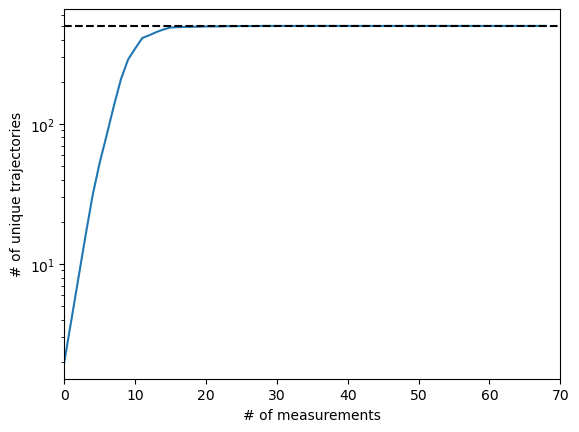

In [99]:
fig,ax=plt.subplots()
ax.plot(num_traj_list)
ax.set_yscale('log')
ax.set_xlim(0,70)
ax.set_xlabel('# of measurements')
ax.set_ylabel('# of unique trajectories')
ax.axhline(500,ls='--',color='k')

In [137]:
num_traj_map=np.array([num_traj_T(df_MPS_0_DW,L=30,p_ctrl=0.4,p_proj=0,sC=sC,T=40) for sC in range(100)])

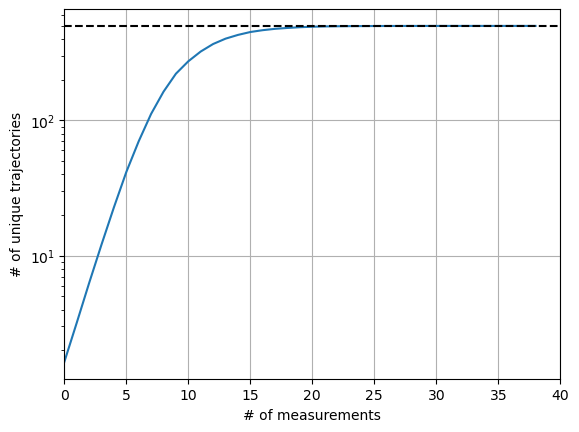

In [138]:
fig,ax=plt.subplots()
ax.plot(num_traj_map.mean(axis=0))
ax.set_yscale('log')
ax.set_xlim(0,40)
ax.set_xlabel('# of measurements')
ax.set_ylabel('# of unique trajectories')
ax.axhline(500,ls='--',color='k')
ax.grid('on')

In [119]:
import matplotlib.pyplot as plt

In [ ]:
?? Maybe make a plot of trajectory, similar to arXiv:2212.14026

## Plot

In [150]:
traj_list=df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics')['observations'].loc[0]j

In [134]:
def plot_U(i,t,ax):
    ax.plot([i,i+1],[t,t+1],color='k',linewidth=0.5)

In [160]:
def plot_P(i,t,m,ax):
    ax.plot([i,i-m,i-1],[t,t+1/2,t+1],color='b',linewidth=0.5)

In [153]:
traj_list[0][0]

{'Site': [10], 'Outcome': [1], 'Type': 'Control'}

In [ ]:
traj_list

In [185]:
def plot_single_traj(traj_list,tmax,ax):
    for idx,traj in enumerate(traj_list[:tmax]):
        if traj[0]['Type']=='Control':
            plot_P(traj[0]['Site'][0],idx,traj[0]['Outcome'][0],ax)
        elif traj[0]['Type']=='Bernoulli':  # Replace 'condition' with the actual condition
            plot_U(traj[0]['Site'][0],idx,ax)

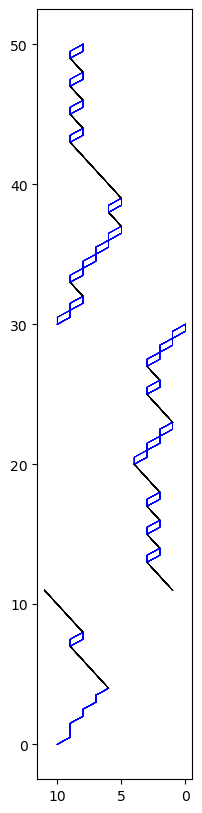

In [180]:
fig,ax=plt.subplots(figsize=(2,10))

for idx in range(50):
    traj0=df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics')['observations'].loc[idx]
    plot_single_traj(traj0,50,ax)

ax.invert_xaxis()

In [182]:
def plot_P_binary(i,t,m,ax):
    f = i+1-2*m
    ax.plot([i,f],[t,t+1],color='b',linewidth=0.5)
    return f

In [195]:
def plot_single_traj_binary(traj_list,tmax,ax):
    i=0
    t=0
    for traj in traj_list[:tmax]:
        if traj[0]['Type']=='Control':
            i=plot_P_binary(i,t,traj[0]['Outcome'][0],ax)
            t+=1

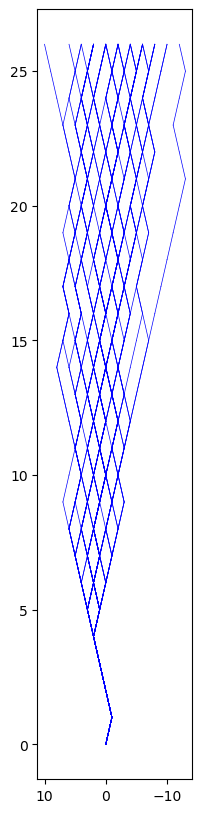

In [198]:
fig,ax=plt.subplots(figsize=(2,10))

for idx in range(50):
    traj0=df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics')['observations'].loc[idx]
    plot_single_traj_binary(traj0,50,ax)

ax.invert_xaxis()

# FDW

## QuVar of FDW

In [122]:
def qvar_dw(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    qvar_dw=dd.xs('DW2')-dd.xs('DW1')**2
    return qvar_dw.mean().values[0], qvar_dw.var().values[0],qvar_dw.shape[0]
    # return qvar_dw

In [123]:
qvar_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

(1.444185833678212, 0.7238277987179111, 500)

In [124]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'1.623,0.033'

In [125]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'1.629,0.034'

In [126]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'1.627,0.035'

In [127]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'1.224,0.024'

In [128]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'1.627,0.038'

In [129]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'1.404,0.033'

In [130]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'0.776,0.016'

In [131]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'0.687,0.015'

In [132]:
num_SC=100
sC_qvar_dw=np.array([qvar_dw(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.3f},{:.3f}'.format(sC_qvar_dw[:,0].mean(),np.sqrt(sC_qvar_dw[:,1].sum()/sC_qvar_dw[:,2].sum()))

'0.738,0.014'

## traj_var of FDW

In [48]:
def traj_var_dw(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')

    return (dd.xs('DW1')).var()[0]

In [59]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.155,0.011'

In [60]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.150,0.015'

In [61]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.138,0.013'

In [62]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.129,0.015'

In [63]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.168,0.016'

In [64]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.143,0.015'

In [65]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.063,0.010'

In [66]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.044,0.007'

In [67]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3f},{:.3f}'.format(np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC))

'0.043,0.007'

In [58]:
traj_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

0.15488138671312626

In [ ]:
traj_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

,observations
sm,
0,8.595845958102574
1,8.326611178924882
2,7.568576414222883
3,8.265966164960947
4,8.445091991106834
...,...
495,7.982707179591197
496,7.753464873544234
497,7.973719576466471


## circuit_var of FDW

In [182]:
def circ_var_dw(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')

    return (dd.xs('DW1')).mean()[0]

In [183]:
circ_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

8.23513415660248

In [190]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'4.272,0.607'

In [191]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'4.077,0.580'

In [192]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'7.963,1.132'

In [193]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'6.656,0.946'

In [194]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'34.688,4.930'

In [195]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'71.187,10.118'

In [196]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'4.141,0.589'

In [197]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'6.345,0.902'

In [198]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_dw)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3f}'.format(sC_circ_var, sC_circ_var_sem)

'3.998,0.568'

In [232]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_dw)
# np.mean(sC_circ_var_dw),np.std(sC_circ_var_dw)/np.sqrt(num_SC)

4.071057878193988

In [233]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_dw)
# np.mean(sC_circ_var_dw),np.std(sC_circ_var_dw)/np.sqrt(num_SC)

7.964022521404832

In [ ]:
?? How does it compare to classical random walk, biased and starting at k=1?

In [69]:
np.unique(df_MPS_0_DW.index.get_level_values('Metrics'))

array(['DW1', 'DW2', 'O1', 'O2', 'Oi', 'op_history'], dtype=object)

# O

## qvar of O

In [134]:
def qvar_O(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    qvar_O=dd.xs('O2')-dd.xs('O1')**2
    return qvar_O.mean().values[0], qvar_O.var().values[0],qvar_O.shape[0]
    # return qvar_O

In [177]:
qvar_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

(0.08096544954505465, 0.0001900131065312912, 500)

In [135]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),np.sqrt(sC_qvar_O[:,1].sum()/sC_qvar_O[:,2].sum()))

'0.0691,4.68e-04'

In [136]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),np.sqrt(sC_qvar_O[:,1].sum()/sC_qvar_O[:,2].sum()))

'0.0391,1.71e-04'

In [137]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),sC_qvar_O[:,1].sum()/np.sqrt(sC_qvar_O[:,2].sum()))

'0.0259,2.02e-06'

In [138]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),np.sqrt(sC_qvar_O[:,1].sum()/sC_qvar_O[:,2].sum()))

'0.0421,3.55e-04'

In [139]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),np.sqrt(sC_qvar_O[:,1].sum()/sC_qvar_O[:,2].sum()))

'0.0234,1.35e-04'

In [140]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),np.sqrt(sC_qvar_O[:,1].sum()/sC_qvar_O[:,2].sum()))

'0.0136,6.41e-05'

In [141]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),np.sqrt(sC_qvar_O[:,1].sum()/sC_qvar_O[:,2].sum()))

'0.0220,2.29e-04'

In [142]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),np.sqrt(sC_qvar_O[:,1].sum()/sC_qvar_O[:,2].sum()))

'0.0058,5.27e-05'

In [143]:
num_SC=100
sC_qvar_O=np.array([qvar_O(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)])
'{:.4f},{:.2e}'.format(sC_qvar_O[:,0].mean(),np.sqrt(sC_qvar_O[:,1].sum()/sC_qvar_O[:,2].sum()))

'0.0025,2.17e-05'

In [236]:
num_SC=100
sC_qvar_O=[qvar_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_O),np.std(sC_qvar_O)/np.sqrt(num_SC)

(0.06912434609023921, 0.0020647096848795043)

In [237]:
num_SC=100
sC_qvar_O=[qvar_O(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_O),np.std(sC_qvar_O)/np.sqrt(num_SC)

(0.039155090774166706, 0.0005838420584064467)

In [238]:
num_SC=100
sC_qvar_O=[qvar_O(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_O),np.std(sC_qvar_O)/np.sqrt(num_SC)

(0.025906526234385146, 0.0003415981325711789)

## traj_var of O

In [68]:
def traj_var_O(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    return dd.xs('O1').var()[0]

In [61]:
traj_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

0.011607035894892788

In [71]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'5.927e-03,2.701e-04'

In [72]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'2.937e-03,1.007e-04'

In [73]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'2.034e-03,6.073e-05'

In [74]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'3.902e-03,3.287e-04'

In [75]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'2.428e-03,1.824e-04'

In [76]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'1.209e-03,8.132e-05'

In [77]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'1.934e-03,2.446e-04'

In [78]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'5.393e-04,7.596e-05'

In [79]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC))

'1.688e-04,2.229e-05'

## circuit_var of O

In [181]:
def circ_var_O(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    return dd.xs('O1').mean()[0]

In [185]:
circ_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

0.027573673355222074

In [199]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'4.755e-02,6.758e-03'

In [200]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'1.357e-02,1.929e-03'

In [202]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'1.113e-02,1.581e-03'

In [203]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'7.493e-02,1.065e-02'

In [204]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'8.825e-02,1.254e-02'

In [205]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'7.856e-02,1.117e-02'

In [206]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'5.060e-02,7.193e-03'

In [207]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'1.915e-02,2.722e-03'

In [208]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_O)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'5.772e-03,8.204e-04'

In [243]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_O)

0.04744827026090902

In [244]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_O)

0.013573266999547695

In [245]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_O)

0.011164835099472753

# Z_1

## qvar of Zi

In [8]:
def qvar_Z(df, L,p_ctrl,p_proj,sC,i):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    qvar_Zi=1-dd.xs('Oi').applymap(lambda x: x[i]**2)
    return qvar_Zi.mean().values[0], qvar_Zi.var().values[0],qvar_Zi.shape[0]

In [15]:
qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=4,i=-1)

(0.8457728980855934, 0.028442067638010517, 500)

In [ ]:
qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=4,i=-1)

0.8457728980855934

### Highest bit

In [144]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_left[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'0.329,0.00427'

In [145]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_left[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'0.323,0.00405'

In [146]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_left[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'0.260,0.00380'

In [147]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'0.653,0.00216'

In [148]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_left[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'0.062,0.00183'

In [149]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_left[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'0.016,0.00124'

In [150]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3f},{:.3e}'.format(sC_qvar_Z_left[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'0.006,5.546e-04'

In [151]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3e},{:.3e}'.format(sC_qvar_Z_left[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'-7.054e-16,8.110e-17'

In [152]:
num_SC=100
sC_qvar_Z_left=np.array([qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)])
'{:.3e},{:.3e}'.format(sC_qvar_Z_left[:,0].mean(),np.sqrt(sC_qvar_Z_left[:,1].sum()/sC_qvar_Z_left[:,2].sum()))

'-8.888e-16,1.005e-16'

### Lowest bit

In [153]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.836,0.00629'

In [154]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.851,0.00620'

In [155]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.841,0.00658'

In [158]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.766,0.00647'

In [161]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.775,0.00696'

In [162]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.803,0.00645'

In [157]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.3e}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.668,1.085e-02'

In [159]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.610,0.00694'

In [160]:
num_SC=100
sC_qvar_Z_right=np.array([qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)])
'{:.3f},{:.5f}'.format(sC_qvar_Z_right[:,0].mean(),np.sqrt(sC_qvar_Z_right[:,1].sum()/sC_qvar_Z_right[:,2].sum()))

'0.653,0.00604'

In [246]:
num_SC=100
sC_qvar_Z_right=[qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_right),np.std(sC_qvar_Z_right)/np.sqrt(num_SC)

(0.3289483372422052, 0.04156150771497301)

In [247]:
num_SC=100
sC_qvar_Z_right=[qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_right),np.std(sC_qvar_Z_right)/np.sqrt(num_SC)

(0.32231839904953935, 0.04177081299456341)

In [248]:
num_SC=100
sC_qvar_Z_right=[qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_right),np.std(sC_qvar_Z_right)/np.sqrt(num_SC)

(0.26024375229821617, 0.039494147753851586)

In [249]:
num_SC=100
sC_qvar_Z_left=[qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_left),np.std(sC_qvar_Z_left)/np.sqrt(num_SC)

(0.8359453414702374, 0.01435548012315748)

In [250]:
num_SC=100
sC_qvar_Z_left=[qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_left),np.std(sC_qvar_Z_left)/np.sqrt(num_SC)

(0.8510813024967825, 0.013374313529025595)

In [251]:
num_SC=100
sC_qvar_Z_left=[qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_left),np.std(sC_qvar_Z_left)/np.sqrt(num_SC)

(0.8413240528799324, 0.011004081718311104)

## traj_var of Zi

In [80]:
def traj_var_Z(df, L,p_ctrl,p_proj,sC,i):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    return dd.xs('Oi').applymap(lambda x: x[i]).var().values[0]

In [111]:
traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=6,i=0)

0.12182746842547218

In [103]:
traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50,i=-1)

0.04172187833456101

### Highest bit

In [111]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'0.037,6.530e-03'

In [110]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'0.033,6.222e-03'

In [112]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'0.029,6.773e-03'

In [104]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'7.542e-03,4.710e-03'

In [105]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'4.002e-03,1.975e-03'

In [106]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'3.018e-03,2.374e-03'

In [107]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'1.069e-04,1.064e-04'

In [108]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'1.044e-30,1.211e-31'

In [109]:
num_SC=100
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
'{:.3e},{:.3e}'.format(np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC))

'1.629e-30,2.149e-31'

### Lowest bit

In [113]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.079,9.717e-03'

In [114]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.064,6.155e-03'

In [115]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.082,8.551e-03'

In [116]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.089,1.145e-02'

In [117]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.081,9.654e-03'

In [118]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.093,1.050e-02'

In [119]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.078,1.041e-02'

In [120]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.080,1.153e-02'

In [121]:
num_SC=100
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
'{:.3f},{:.3e}'.format(np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC))

'0.065,1.150e-02'

## circuit_var of Z

In [209]:
def circ_var_Z(df, L,p_ctrl,p_proj,sC,i):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    return dd.xs('Oi').applymap(lambda x: x[i]).mean().values[0]

In [214]:
circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=3,i=0)

1.0000000000000004

In [215]:
circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50,i=-1)

-0.510283649266816

### Highest bit

In [227]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.216,3.075e-02'

In [228]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.269,3.821e-02'

In [229]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.255,3.630e-02'

In [230]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.128,1.826e-02'

In [231]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.086,1.229e-02'

In [232]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'2.599e-02,3.694e-03'

In [233]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'1.373e-03,1.952e-04'

In [234]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'2.120e-31,3.013e-32'

In [235]:
num_SC=100
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_left)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3e},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'3.860e-31,5.487e-32'

### Lowest bit

In [236]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.084,1.194e-02'

In [237]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.085,1.201e-02'

In [238]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.076,1.082e-02'

In [239]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.143,2.030e-02'

In [240]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.137,1.946e-02'

In [241]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.5,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.105,1.486e-02'

In [242]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.244,3.470e-02'

In [243]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=20,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.277,3.932e-02'

In [244]:
num_SC=100
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=30,p_ctrl=0.6,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
sC_circ_var=np.var(sC_circ_var_Z_right)
sC_circ_var_sem=sC_circ_var*np.sqrt(2/(num_SC-1))
'{:.3f},{:.3e}'.format(sC_circ_var, sC_circ_var_sem)

'0.247,3.516e-02'

In [120]:
num_SC=50
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]

np.var(sC_circ_var_Z_right)

0.08287922886302779

In [194]:
df_MPS_0_DW.xs(20,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('dw1',level='Metrics')

,observations
sm,
0,16.61630843072915
1,16.660991586580508
2,16.673339244685252
3,16.825154890560217
4,16.54317402506362
...,...
495,16.986097016147177
496,17.347125376363778
497,17.243169791520977


In [195]:
df_MPS_0_DW.xs(20,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('dw2',level='Metrics')

,observations
sm,
0,278.43879379109353
1,281.05608301650176
2,279.9290195706446
3,284.4791177454983
4,275.7232849771889
...,...
495,289.9058812196481
496,302.2104394226964
497,298.9892100989224


In [196]:
df_MPS_0_DW.xs(20,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('dw2',level='Metrics')-df_MPS_0_DW.xs(20,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('dw1',level='Metrics')**2

,observations
sm,
0,2.337088
1,3.467442
2,1.928778
3,1.393281
4,2.046678
...,...
495,1.378389
496,1.287681
497,1.662306


In [52]:
71/200

0.355

In [41]:
df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('op_history',level='Metrics')

,observations
sm,
0,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
1,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
2,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
3,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
4,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
...,...
495,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
496,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
497,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."


In [52]:
d1['O']

0.44234512037467527

In [53]:
d2['O']

0.33876001349717366

In [50]:
d1=load_json('MPS_0-1_C_m_x01/MPS_(0,1)_L10_pctrl0.400_pproj0.000_sC0_sm0_x01_DW_O_op.json')

In [51]:
d2=load_json('MPS_0-1_C_m_x01/MPS_(0,1)_L10_pctrl0.400_pproj0.000_sC0_sm1_x01_DW_O_op.json')

In [36]:
d3=load_json('MPS_(0,1)_L8_pctrl0.500_pproj0.000_sC1_sm0_x01_DW_O_op.json')

In [20]:
d1['op_history']

[[{'Site': [8, 1], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [1, 2], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [2], 'Outcome': [1], 'Type': 'Control'}],
 [{'Site': [1], 'Outcome': [1], 'Type': 'Control'}],
 [{'Site': [8], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [7], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [6], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [5], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [4, 5], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [5, 6], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [6, 7], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [7, 8], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [8, 1], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [1, 2], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [2], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [1], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [8], 'Outcome': [1], 'Type': 'Control'}],
 [{'Site': [7], 'Outcome': [1], 'Type': 'Control'}]

In [43]:
d2['op_history'][0]

[{'Site': [8, 1], 'Outcome': None, 'Type': 'Bernoulli'}]

In [46]:
all([x[0]['Site'] == y[0]['Site'] for x,y in zip(d1['op_history'],d2['op_history'])])

True

In [54]:
[(x[0]['Outcome'] , y[0]['Outcome']) for x,y in zip(d1['op_history'],d2['op_history'])]

[(None, None),
 (None, None),
 ([1], [1]),
 (None, None),
 (None, None),
 (None, None),
 ([1], [0]),
 (None, None),
 (None, None),
 (None, None),
 ([0], [0]),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 ([0], [0]),
 ([1], [1]),
 (None, None),
 (None, None),
 (None, None),
 ([0], [0]),
 ([0], [1]),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 ([0], [1]),
 (None, None),
 (None, None),
 ([0], [0]),
 ([1], [1]),
 (None, None),
 (None, None),
 ([1], [1]),
 (None, None),
 (None, None),
 (None, None),
 ([0], [0]),
 ([0], [0]),
 ([1], [1]),
 (None, None),
 ([0], [1]),
 (None, None),
 ([1], [0]),
 ([0], [0]),
 (None, None),
 ([0], [0]),
 ([1], [0]),
 ([1], [1]),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 ([1], [0]),
 ([0], [1]),
 ([0], [1]),
 ([1], [0]),
 ([0], [1]),
 (None, None),


In [49]:
[(x[0] , y[0]) for x,y in zip(d1['op_history'],d2['op_history']) if x[0] != y[0]]

[]